<a href="https://colab.research.google.com/github/mayankprsingh/cifar10Classification/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of CIFAR Images**

**Import Keras and TensoeFlow**

In [3]:
import tensorflow as tf
import keras

**Import CIFAR10 Dataset and Prepare**

In [4]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


**Shape of Datasets**

In [5]:
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


**List of Classes**

In [6]:
NUM_CLASSES = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

**Normalize Dataset**

In [7]:
train_images2 = (train_images/255) - 0.5
test_images2 = (test_images/255) - 0.5
train_labels2 = keras.utils.to_categorical(train_labels,NUM_CLASSES)                #class labels to one-hot encoded vectors
test_labels2 = keras.utils.to_categorical(test_labels,NUM_CLASSES)

train_images, test_images = train_images / 255.0, test_images / 255.0               #pixels values b/w 0 and 1

**Plot Dataset**

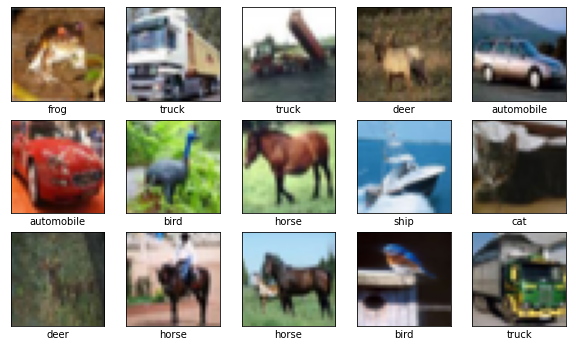

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(15):                                 #import first 15 images
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **CNN Model**

In [112]:
from tensorflow.keras import layers, models

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [115]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**Dense Layers**

In [116]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(10))

In [117]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)              

## **Train Model**

In [118]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5313 - accuracy: 0.4401 - val_loss: 1.2859 - val_accuracy: 0.5341
Epoch 2/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.1773 - accuracy: 0.5818 - val_loss: 1.1753 - val_accuracy: 0.5871
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0261 - accuracy: 0.6392 - val_loss: 1.0670 - val_accuracy: 0.6144
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9247 - accuracy: 0.6736 - val_loss: 0.9790 - val_accuracy: 0.6523
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8576 - accuracy: 0.6993 - val_loss: 0.8995 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7893 - accuracy: 0.7234 - val_loss: 0.8806 - val_accuracy: 0.6907
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7437 - accuracy: 0.7399 - val_loss: 0.8828 -

**Plot Model Accuracy and Loss**

313/313 - 4s - loss: 0.8578 - accuracy: 0.7111


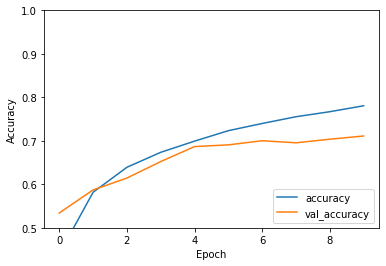

In [119]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

**Test Accuracy**

In [120]:
print(test_acc)

0.7110999822616577


## **Test Model**

Use model.predict() to predict the probabilities of our  test set

In [103]:
import numpy as np

pred_test_labels = model.predict(test_images2)
pred_test_labels_classes = np.argmax(pred_test_labels, axis=1)
pred_test_labels_max_probas = np.max(pred_test_labels, axis=1)

Randon set of images with their probabilities

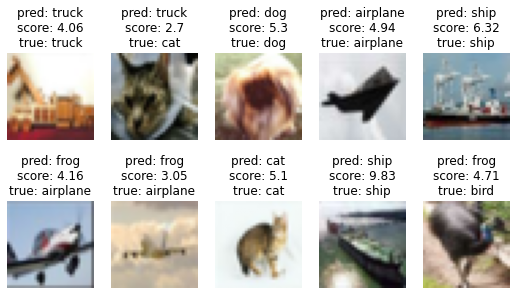

In [108]:
cols = 5
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        pred_label =  class_names[pred_test_labels_classes[random_index]]
        pred_proba = pred_test_labels_max_probas[random_index]
        true_label = class_names[test_labels[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()